# Numerical operations on arrays

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Elementwise operations

### Basic operations

With scalars:

In [2]:
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [3]:
2 ** a

array([ 2,  4,  8, 16])

All arithmetic operates elementwise:

In [4]:
b = np.ones(4) + 1
a - b

array([-1.,  0.,  1.,  2.])

In [5]:
a * b

array([2., 4., 6., 8.])

In [6]:
j = np.arange(5)
2**(j + 1) - j

array([ 2,  3,  6, 13, 28])

These operations are of course much faster than if you did them in pure python:

In [7]:
a = np.arange(10000)
%timeit a + 1

3.46 μs ± 98.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
l = range(10000)
%timeit [i+1 for i in l]

600 μs ± 14.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**Warning: array multiplication is not matrix multiplication**

Consider these examples:

In [9]:
c = np.ones((3, 3))
c * c                   # NOT matrix multiplication!

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

**Matrix multiplication:**

In [10]:
c @ c

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

::: {exercise-start}
:label: elementwise-exercise
:class: dropdown
:::

- Try simple arithmetic elementwise operations: add even elements
  with odd elements
- Time them against their pure python counterparts using `%timeit`.
- Generate:

  - `[2**0, 2**1, 2**2, 2**3, 2**4]`
  - `a_j = 2^(3*j) - j`

::: {exercise-end}
:::

### Other operations

#### Comparisons

In [11]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [12]:
a > b

array([False, False,  True, False])

Array-wise comparisons:

In [13]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
np.array_equal(a, b)

False

In [14]:
np.array_equal(a, c)

True

#### Logical operations

In [15]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

array([ True,  True,  True, False])

In [16]:
np.logical_and(a, b)

array([ True, False, False, False])

#### Transcendental functions

In [17]:
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [18]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [19]:
np.log(np.exp(a))

array([0., 1., 2., 3., 4.])

#### Shape mismatches

In [20]:
a = np.arange(4)
a + np.array([1, 2])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

_Broadcasting?_ We'll return to that {ref}`later <broadcasting>`.

#### Transposition

In [21]:
a = np.triu(np.ones((3, 3)), 1)   # see help(np.triu)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [22]:
a.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

Remember, **the transposition is a view**.

The transpose returns a _view_ of the original array:

In [23]:
a = np.arange(9).reshape(3, 3)
a.T[0, 2] = 999
a.T

array([[  0,   3, 999],
       [  1,   4,   7],
       [  2,   5,   8]])

In [24]:
a

array([[  0,   1,   2],
       [  3,   4,   5],
       [999,   7,   8]])

#### Linear algebra

The sub-module {mod}`numpy.linalg` implements basic linear algebra, such as
solving linear systems, singular value decomposition, etc. However, it is
not guaranteed to be compiled using efficient routines, and thus we
recommend the use of {mod}`scipy.linalg`, as detailed in section
{ref}`scipy-linalg`

::: {exercise-start}
:label: other-operations-exercise
:class: dropdown
:::

- Look at the help for `np.allclose`. When might this be useful?
- Look at the help for `np.triu` and `np.tril`.

::: {exercise-end}
:::

## Basic reductions

### Computing sums

In [25]:
x = np.array([1, 2, 3, 4])
np.sum(x)

np.int64(10)

In [26]:
x.sum()

np.int64(10)

![](images/reductions.png)

Sum by rows and by columns:

In [27]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [28]:
x.sum(axis=0)   # columns (first dimension)

array([3, 3])

In [29]:
x[:, 0].sum(), x[:, 1].sum()

(np.int64(3), np.int64(3))

In [30]:
x.sum(axis=1)   # rows (second dimension)

array([2, 4])

In [31]:
x[0, :].sum(), x[1, :].sum()

(np.int64(2), np.int64(4))

Here is the same idea in higher dimensions:

In [32]:
rng = np.random.default_rng(27446968)
x = rng.random((2, 2, 2))
x.sum(axis=2)[0, 1]

np.float64(0.7341517644004746)

In [33]:
x[0, 1, :].sum()

np.float64(0.7341517644004746)

### Other reductions

These work the same way (and take `axis=`)

#### Extrema

In [34]:
x = np.array([1, 3, 2])
x.min()

np.int64(1)

In [35]:
x.max()

np.int64(3)

In [36]:
x.argmin()  # index of minimum

np.int64(0)

In [37]:
x.argmax()  # index of maximum

np.int64(1)

#### Logical operations

In [38]:
np.all([True, True, False])

np.False_

In [39]:
np.any([True, True, False])

np.True_

This can be used for array comparisons:

In [40]:
a = np.zeros((100, 100))
np.any(a != 0)

np.False_

In [41]:
np.all(a == a)

np.True_

In [42]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c)).all()

np.True_

**Statistics:**

In [43]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

np.float64(1.75)

In [44]:
np.median(x)

np.float64(1.5)

In [45]:
np.median(y, axis=-1) # last axis

array([2., 5.])

In [46]:
x.std()          # full population standard dev.

np.float64(0.82915619758885)

... and many more (best to learn as you go).

::: {exercise-start}
:label: reductions-exercise
:class: dropdown
:::

Given there is a `sum`, what other function might you expect to see?
What is the difference between `sum` and `cumsum`?

::: {exercise-end}
:::

#### Worked Example: diffusion using a random walk algorithm

![](random_walk.png)

Let us consider a simple 1D random walk process: at each time step a
walker jumps right or left with equal probability.

We are interested in finding the typical distance from the origin of a
random walker after `t` left or right jumps? We are going to
simulate many "walkers" to find this law, and we are going to do so
using array computing tricks: we are going to create a 2D array with
the "stories" (each walker has a story) in one direction, and the
time in the other:

![](random_walk_schema.png)

In [47]:
n_stories = 1000 # number of walkers
t_max = 200      # time during which we follow the walker

We randomly choose all the steps 1 or -1 of the walk:

In [48]:
t = np.arange(t_max)
rng = np.random.default_rng()
steps = 2 * rng.integers(0, 1 + 1, (n_stories, t_max)) - 1 # +1 because the high value is exclusive
np.unique(steps) # Verification: all steps are 1 or -1

array([-1,  1])

We build the walks by summing steps along the time:

In [49]:
positions = np.cumsum(steps, axis=1) # axis = 1: dimension of time
sq_distance = positions**2

We get the mean in the axis of the stories:

In [50]:
mean_sq_distance = np.mean(sq_distance, axis=0)

Plot the results:

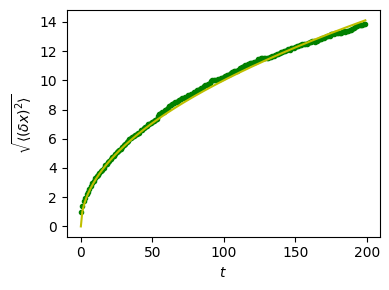

In [51]:
plt.figure(figsize=(4, 3))
plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-')
plt.xlabel(r"$t$")
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$")
plt.tight_layout() # provide sufficient space for labels

We find a well-known result in physics: the Root Mean Square (RMS) distance
grows as the square root of the time!

## Interim summary and exercises

| Operation type | Numpy functions              |
| -------------- | ---------------------------- |
| arithmetic     | `sum`, `prod`, `mean`, `std` |
| Extrema        | `min`, `max`                 |
| logical        | `all`, `any`                 |

Also, recall the `axis` argument to select the dimension over which an operation will be applied:

In [52]:
arr = np.array([[99, 12], [11, 2]])
arr

array([[99, 12],
       [11,  2]])

In [53]:
# Without axis=, operation applied over whole (flatted, 1D) array.
np.min(arr)

np.int64(2)

In [54]:
# Operate along first axis (rows).
np.min(arr, axis=0)

array([11,  2])

In [55]:
# Operate along second axis (columns).
np.min(arr, axis=1)

array([12,  2])

::: {exercise-start}
:label: any-all-ex
:class: dropdown
:::

We load an array from a text file:

In [56]:
an_array = np.loadtxt('data/an_array.txt')

1. Verify if all elements in `an array` are equal to 1:
2. Verify if any elements in an array are equal to 1
3. Compute mean and standard deviation.
4. Challenge: write a function `my_std` that computes the standard deviation
   of the elements in the array, where you are only allowed to use `np.sum`
   from Numpy in your function. Check your function returns a value close to that from `np.std` (use `np.allclose` for that check).

::: {exercise-end}
:::

::: {solution-start} any-all-ex
:class: dropdown
:::

In [57]:
# 1. Verify if all elements in `an array` are equal to 1:
np.all(an_array == 1)

# 2. Verify if any elements in an array are equal to 1
np.any(an_array == 1)

# 3. Compute mean and standard deviation.
print('Mean', np.mean(an_array))
print('STD', np.std(an_array))

Mean 4.025
STD 2.1850343246731843


In [58]:
# 4. Challenge: write a function `my_std` that computes the standard deviation
# of the elements in the array, where you are only allowed to use `np.sum` from
# Numpy in your function.

def my_std(a):
    n = a.size
    m = np.sum(a) / n
    return np.sqrt(np.sum((a - m) ** 2) / n)

# Check we get the same answers from our function as for Numpy.
assert np.allclose(my_std(an_array), np.std(an_array))
assert np.allclose(my_std(an_array.ravel()), np.std(an_array))

rng = np.random.default_rng()
for i in range(10):
    another_array = rng.uniform(size=(10, 4))
    assert np.allclose(my_std(another_array), np.std(another_array))

::: {solution-end}
:::

(broadcasting)=

## Broadcasting

- Basic operations on `numpy` arrays (addition, etc.) are elementwise

- This works on arrays of the same size.

- **Nevertheless** , it's also possible to do
  operations on arrays of different sizes if
  _NumPy_ can transform these arrays so that
  they all have the same size: this conversion
  is called **broadcasting**.

The image below gives an example of broadcasting:

![](images/numpy_broadcasting.png)

Let's verify:

In [59]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [60]:
b = np.array([0, 1, 2])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

We have already used broadcasting without knowing it!:

In [61]:
a = np.ones((4, 5))
a[0] = 2  # we assign an array of dimension 0 to an array of dimension 1
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

A useful trick:

In [62]:
a = np.arange(0, 40, 10)
a.shape

(4,)

In [63]:
a = a[:, np.newaxis]  # adds a new axis -> 2D array
a.shape

(4, 1)

In [64]:
a

array([[ 0],
       [10],
       [20],
       [30]])

In [65]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

::: {note}
:class: dropdown

Broadcasting seems a bit magical, but it is actually quite natural to
use it when we want to solve a problem whose output data is an array
with more dimensions than input data.
:::

### Worked Example: Broadcasting

Let's construct an array of distances (in miles) between cities of
Route 66: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City,
Amarillo, Santa Fe, Albuquerque, Flagstaff and Los Angeles.

In [66]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544,
       1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

![](images/route66.png)

A lot of grid-based or network-based problems can also use
broadcasting. For instance, if we want to compute the distance from
the origin of points on a 5x5 grid, we can do

In [67]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

Or in color:

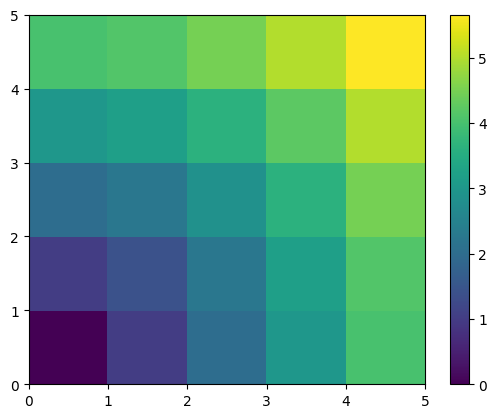

In [68]:
plt.pcolor(distance)
plt.colorbar()

**Remark** : the {func}`numpy.ogrid` function allows to directly create
vectors x and y of the previous example, with two "significant dimensions":

In [69]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]),
 array([[0, 1, 2, 3, 4]]))

In [70]:
x.shape, y.shape
distance = np.sqrt(x ** 2 + y ** 2)

So, `np.ogrid` is very useful as soon as we have to handle
computations on a grid. On the other hand, `np.mgrid` directly
provides matrices full of indices for cases where we can't (or don't
want to) benefit from broadcasting:

In [71]:
x, y = np.mgrid[0:4, 0:4]
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [72]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

<!---
rules
-->
<!---
some usage examples: scalars, 1-d matrix products
-->
<!---
newaxis
-->
<!---
EXE: add 1-d array to a scalar
-->
<!---
EXE: add 1-d array to a 2-d array
-->
<!---
EXE: multiply matrix from the right with a diagonal array
-->
<!---
CHA: constructing grids -- meshgrid using only newaxis
-->

:::{admonition} See also

{ref}`broadcasting-advanced`: discussion of broadcasting in
the {ref}`advanced-numpy` chapter.
:::

## Array shape manipulation

### Flattening

In [73]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [74]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [75]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

Higher dimensions: last dimensions ravel out "first".

### Reshaping

The inverse operation to flattening:

In [76]:
a.shape

(2, 3)

In [77]:
b = a.ravel()
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

Or,

In [78]:
a.reshape((2, -1))    # unspecified (-1) value is inferred

array([[1, 2, 3],
       [4, 5, 6]])

:::{warning}
`ndarray.reshape` **may** return a view (cf `help(np.reshape)`)),
or copy
:::

For example, consider:

In [79]:
b[0, 0] = 99
a

array([[99,  2,  3],
       [ 4,  5,  6]])

Beware: reshape may also return a copy!:

In [80]:
a = np.zeros((3, 2))
b = a.T.reshape(3*2)
b[0] = 9
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

To understand this you need to learn more about the memory layout of a NumPy array.

### Adding a dimension

Indexing with the `np.newaxis` object allows us to add an axis to an array
(you have seen this already above in the broadcasting section):

In [81]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [82]:
z[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [83]:
z[np.newaxis, :]

array([[1, 2, 3]])

### Dimension shuffling

In [84]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a.shape

(4, 3, 2)

In [85]:
a[0, 2, 1]

np.int64(5)

In [86]:
b = a.transpose(1, 2, 0)
b.shape

(3, 2, 4)

In [87]:
b[2, 1, 0]

np.int64(5)

Also creates a view:

In [88]:
b[2, 1, 0] = -1
a[0, 2, 1]

np.int64(-1)

### Resizing

Size of an array can be changed with `ndarray.resize`:

In [89]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

However, it must not be referred to somewhere else:

In [90]:
b = a
a.resize((4,))

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

<!---
seealso: ``help(np.tensordot)``
-->
<!---
resizing: how to do it, and *when* is it possible (not always!)
-->
<!---
reshaping (demo using an image?)
-->
<!---
dimension shuffling
-->
<!---
when to use: some pre-made algorithm (e.g. in Fortran) accepts only
1-D data, but you'd like to vectorize it
-->
<!---
EXE: load data incrementally from a file, by appending to a resizing array
-->
<!---
EXE: vectorize a pre-made routine that only accepts 1-D data
-->
<!---
EXE: manipulating matrix direct product spaces back and forth (give an example from physics -- spin index and orbital indices)
-->
<!---
EXE: shuffling dimensions when writing a general vectorized function
-->
<!---
CHA: the mathematical 'vec' operation
-->

::: {exercise-start}
:label: shape-manipulation-exercise
:class: dropdown
:::

- Look at the docstring for `reshape`, especially the notes section which
  has some more information about copies and views.
- Use `flatten` as an alternative to `ravel`. What is the difference?
  (Hint: check which one returns a view and which a copy)
- Experiment with `transpose` for dimension shuffling.

::: {exercise-end}
:::

## Sorting data

Sorting along an axis:

In [91]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

:::{note}
Sorts each row separately!
:::

In-place sort:

In [92]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

Sorting with fancy indexing:

In [93]:
a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0])

In [94]:
a[j]

array([1, 2, 3, 4])

Finding minima and maxima:

In [95]:
a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(np.int64(0), np.int64(2))

<!---
XXX: need a frame for summaries

* Arithmetic etc. are elementwise operations
* Basic linear algebra, ``@``
* Reductions: ``sum(axis=1)``, ``std()``, ``all()``, ``any()``
* Broadcasting: ``a = np.arange(4); a[:,np.newaxis] + a[np.newaxis,:]``
* Shape manipulation: ``a.ravel()``, ``a.reshape(2, 2)``
* Fancy indexing: ``a[a > 3]``, ``a[[2, 3]]``
* Sorting data: ``.sort()``, ``np.sort``, ``np.argsort``, ``np.argmax``
-->

::: {exercise-start}
:label: sorting-exercise
:class: dropdown
:::

- Try both in-place and out-of-place sorting.
- Try creating arrays with different dtypes and sorting them.
- Use `all` or `array_equal` to check the results.
- Look at `np.random.shuffle` for a way to create sortable input quicker.
- Combine `ravel`, `sort` and `reshape`.
- Look at the `axis` keyword for `sort` and rewrite the previous
  exercise.

::: {exercise-end}
:::

## Summary

**What do you need to know to get started?**

- Know how to create arrays : `array`, `arange`, `ones`,
  `zeros`.

- Know the shape of the array with `array.shape`, then use slicing
  to obtain different views of the array: `array[::2]`,
  etc. Adjust the shape of the array using `reshape` or flatten it
  with `ravel`.

- Obtain a subset of the elements of an array and/or modify their values
  with masks, with e.g.:

  ```python
  a[a < 0] = 0
  ```

- Know miscellaneous operations on arrays, such as finding the mean or max
  (`array.max()`, `array.mean()`). No need to retain everything, but
  have the reflex to search in the documentation (online docs,
  `help()`)!!

- For advanced use: master the indexing with arrays of integers, as well as
  broadcasting. Know more NumPy functions to handle various array
  operations.

:::{admonition} Quick read
If you want to do a first quick pass through the Scientific Python Lectures
to learn the ecosystem, you can directly skip to the next chapter:
{ref}`matplotlib`.

The remainder of this chapter is not necessary to follow the rest of
the intro part. But be sure to come back and finish this chapter, as
well as to do some more {ref}`exercises <numpy-exercises>`.
:::